In [12]:
from google.colab import drive
drive.mount("/content/drive/") 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os 
import re

json_folder_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/大伯 - ML_Code/UTKFace-model_training_json")
os.chdir(json_folder_path)

json_list = ["ResNet50-unfreeze", "Xception-unfreeze", "EfficientnetV2-l-21k-ft1k"]

json_content = {i: None for i in sorted(json_list)}
# json_content

match_json = []

for i in os.listdir(os.getcwd()):
    if re.fullmatch(r"\S*\.json", i):
        match_json.append(i)
       
# match_json

data_json = []
for link in sorted(match_json):
    with open(link, encoding='utf-8') as f:
        data = json.load(f)
        data_json.append(data)
               
print(data_json)



[{'loss': [1.2576489448547363, 0.9342937469482422, 0.8471782207489014, 0.7987402677536011, 0.7529754042625427, 0.7218790054321289, 0.6923514008522034, 0.663527250289917, 0.6386404037475586], 'accuracy': [0.5851457118988037, 0.7436655759811401, 0.7907516956329346, 0.8133974075317383, 0.8342483043670654, 0.8501900434494019, 0.8654455542564392, 0.8798564672470093, 0.8937922716140747], 'val_loss': [0.9636754989624023, 0.8548423647880554, 0.8017881512641907, 0.7735459208488464, 0.7669488191604614, 0.7506780624389648, 0.7414356470108032, 0.7550032734870911, 0.738946259021759], 'val_accuracy': [0.7204861044883728, 0.784288227558136, 0.8059895634651184, 0.8211805820465088, 0.8294270634651184, 0.8328993320465088, 0.83984375, 0.8411458134651184, 0.8485243320465088]}, {'loss': [1.9733855724334717, 0.7098973393440247, 0.5147261619567871, 0.41283950209617615, 0.3439905345439911, 0.30604249238967896], 'accuracy': [0.6546136140823364, 0.7776604890823364, 0.8312394618988037, 0.8608002662658691, 0.8825

In [100]:
sorted(json_list)

['EfficientnetV2-l-21k-ft1k', 'ResNet50-unfreeze', 'Xception-unfreeze']

In [132]:
save_model_name = "model_predict_curves_3"

def plot_model_pred_curves(json_file, model_list):
    fig, ax = plt.subplots(1, 2, sharex = True, figsize = (15, 8))
    cmap = ["b", "g", "r", "c", "m", "y", "k", "w"]
    metrics = ["accuracy", "loss"]
    locations = ['lower right', 'upper right']

    for idx, (hist, name) in enumerate(zip(json_file, model_list)):
        ax[0].plot(hist['val_accuracy'], f'{cmap[idx]}--', label = name+' val_accuracy')
        ax[1].plot(hist['val_loss'], f'{cmap[idx]}--', label = name+' val_loss')
        
    for i, axes in enumerate(ax):
        axes.set_xlabel('epoch', fontsize = 14)
        axes.set_ylabel(metrics[i], fontsize = 14)
        axes.grid()
        axes.legend(loc=locations[i], fontsize = 14)
    plt.tight_layout()
    plt.show()

    # save figure
    fig.savefig(save_model_name, format = 'png', dpi = 300)  
    print('save figure: ', save_model_name)

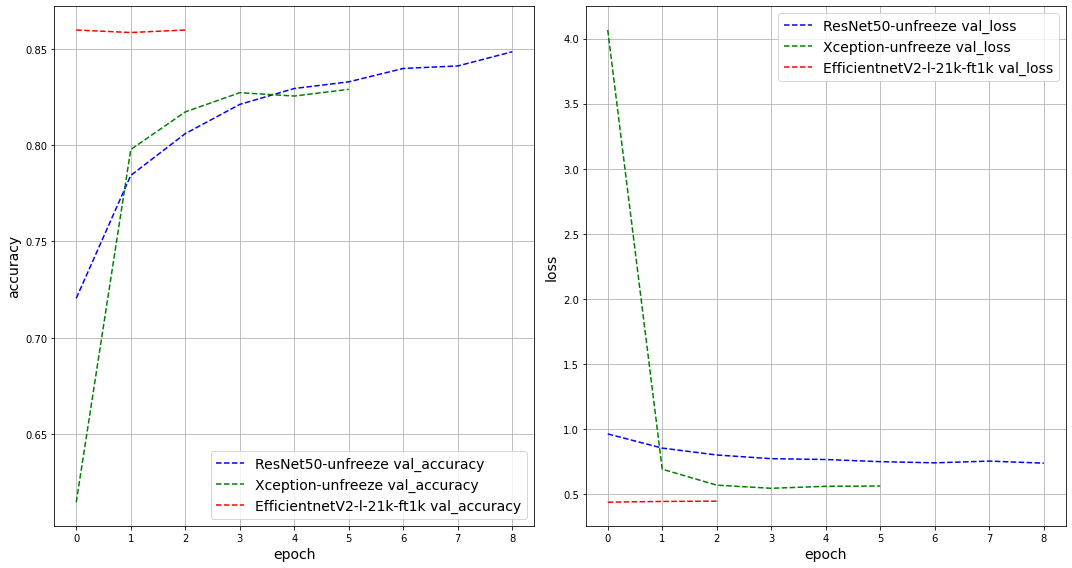

save figure:  model_predict_curves_3


In [133]:
plot_model_pred_curves(data_json, json_list)